In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load CSV data into a DataFrame
df = pd.read_csv('C:/Users/sisma/PycharmProjects/pythonProject/pythonsentimentalanalysis/Sentiment_Data_Analysis.csv')

print(df.head())

      User Account  Followers  Tweets  Retweets  \
0  AccurateWriter_        472   14942         1   
1     assignment78        107    2369         0   
2          JKerski        500    1127         2   
3      sellsidecfo        248     160         0   
4          opalbiz         18     579         0   

                                                Text  \
0  pay somebody to do your\r\nhomework\r\nhtml\r\...   
1  hey\n\nhire us to help you with \npower bi\ndi...   
2  videos were finalized last week  now i just ne...   
3  aidriven data cleanup  power bi tools that aut...   
4  some guy named chris aka our vp of technology ...   

                        Date         Location  \
0  2023-02-16 23:06:36+00:00   Greensboro, NC   
1  2023-02-16 23:00:12+00:00  New Jersey, USA   
2  2023-02-16 22:31:00+00:00  Washington D.C.   
3  2023-02-16 22:11:23+00:00   Pittsburgh, PA   
4  2023-02-16 22:10:05+00:00     McMurray, PA   

                                  Hashtags Sentiment  Categor

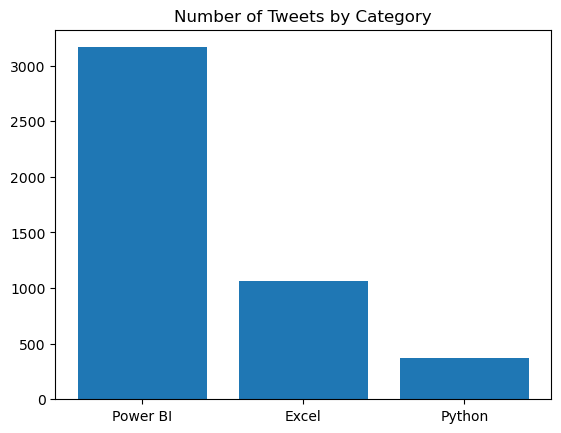

In [3]:
selected_categories = ["Python", "Excel", "Power BI"]
category_counts = df[df["Category"].isin(selected_categories)]["Category"].value_counts()
plt.bar(category_counts.index, category_counts.values)
plt.title("Number of Tweets by Category")
plt.show()


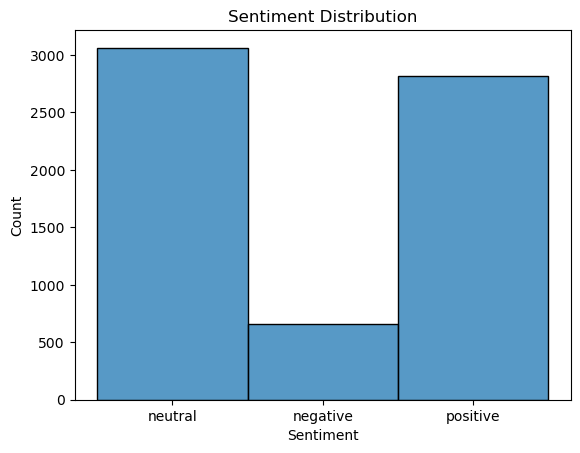

In [4]:
sns.histplot(df["Sentiment"])
plt.title("Sentiment Distribution")
plt.show()

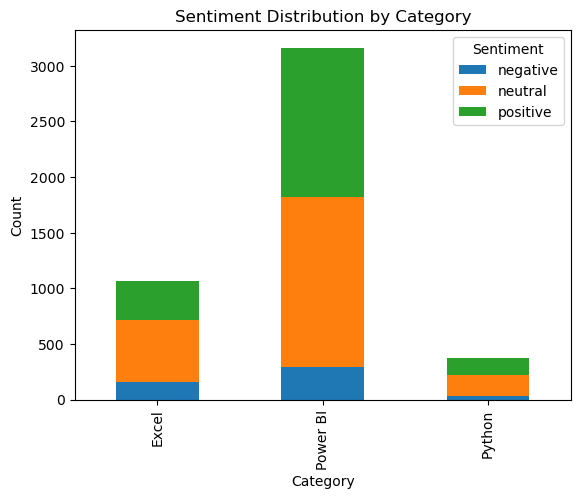

In [5]:
# filter the dataframe to only include the 'Python', 'Excel', and 'Power BI' categories
categories = ['Python', 'Excel', 'Power BI']
df = df[df['Category'].isin(categories)]

# group the dataframe by 'Category' and 'Sentiment', and count the tweets in each group
counts = df.groupby(['Category', 'Sentiment']).size().reset_index(name='Count')

# pivot the counts table to create a dataframe with categories as columns and sentiment counts as values
pivot_counts = counts.pivot(index='Category', columns='Sentiment', values='Count')


# create a stacked bar chart of the sentiment distribution for each category
pivot_counts.plot(kind='bar', stacked=True)

# set the x-axis label
plt.xlabel('Category')

# set the y-axis label
plt.ylabel('Count')

# set the title
plt.title('Sentiment Distribution by Category')

# show the plot
plt.show()


C:\Users\sisma\AppData\Local\Temp\ipykernel_29952\1970246033.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_df["Tweet Date"] = pd.to_datetime(category_df["Date"])
C:\Users\sisma\AppData\Local\Temp\ipykernel_29952\1970246033.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_df["Tweet Date"] = pd.to_datetime(category_df["Date"])
C:\Users\sisma\AppData\Local\Temp\ipykernel_29952\1970246033.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

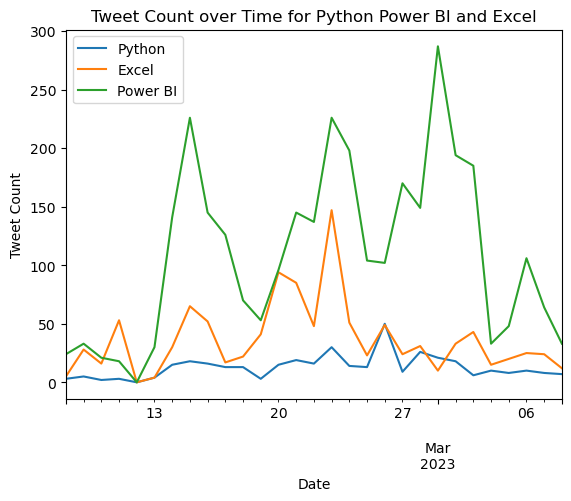

In [6]:
# Filter the DataFrame to include only "Python" and "Excel" categories
categories_to_plot = ["Python", "Excel","Power BI"]
filtered_df = df[df["Category"].isin(categories_to_plot)]

# Create a plot for each category
for category in categories_to_plot:
    category_df = filtered_df[filtered_df["Category"] == category]
    category_df["Tweet Date"] = pd.to_datetime(category_df["Date"])
    category_df.set_index("Tweet Date", inplace=True)
    category_df.resample("D").size().plot(label=category)

# Set plot title and labels
plt.title("Tweet Count over Time for Python Power BI and Excel")
plt.xlabel("Date")
plt.ylabel("Tweet Count")

# Show legend
plt.legend()

# Show the plot
plt.show()

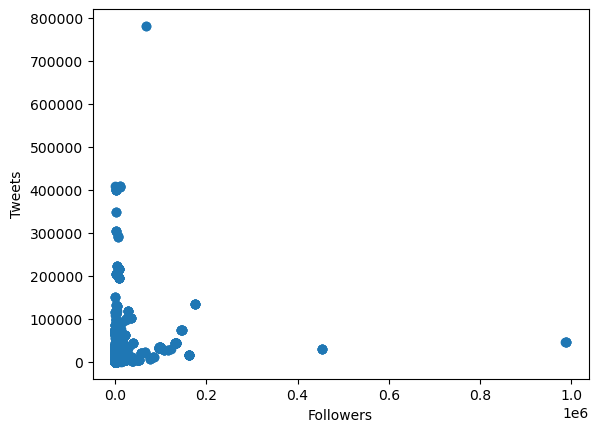

In [7]:
plt.scatter(df['Followers'], df['Tweets'])
plt.xlabel('Followers')
plt.ylabel('Tweets')
plt.show()


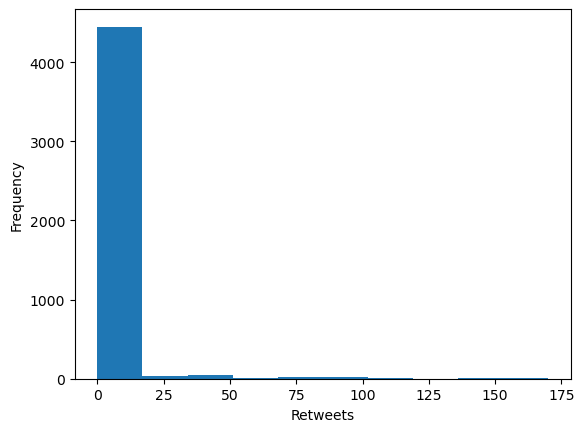

In [8]:
plt.hist(df['Retweets'])
plt.xlabel('Retweets')
plt.ylabel('Frequency')
plt.show()


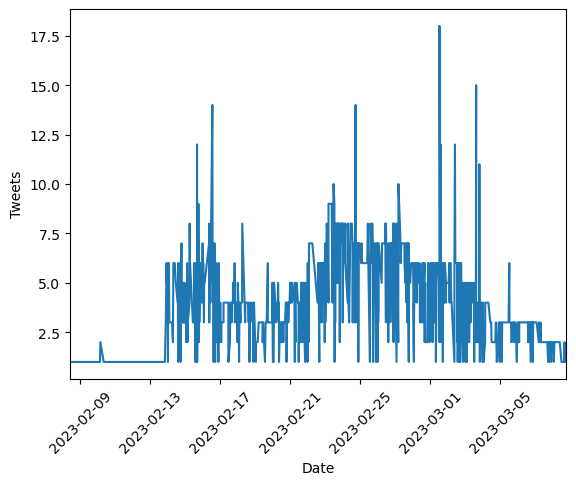

In [9]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.groupby('Date').size().reset_index(name='Count')

plt.plot(df['Date'], df['Count'])
plt.xlabel('Date')
plt.ylabel('Tweets')
plt.xticks(rotation=45)  # rotate the x-axis labels by 45 degrees
plt.xlim(df['Date'].min(), df['Date'].max())  # set the x-axis limits to the minimum and maximum dates in the dataset
plt.show()




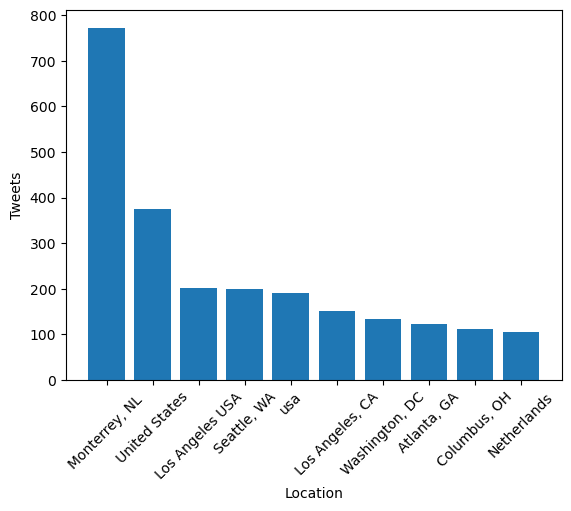

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('C:/Users/sisma/PycharmProjects/pythonProject/pythonsentimentalanalysis/Sentiment_Data_Analysis.csv')

location_counts = df['Location'].value_counts()
location_counts = location_counts[:10] # Display only top 10 locations

plt.bar(location_counts.index, location_counts.values)
plt.xticks(rotation=45)
plt.xlabel('Location')
plt.ylabel('Tweets')
plt.show()


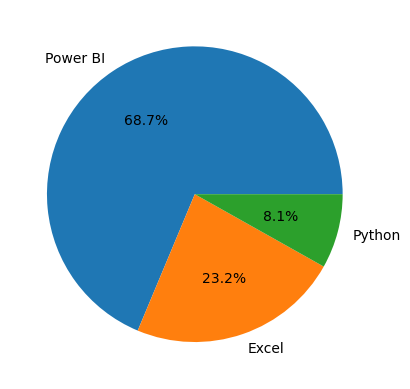

In [11]:
selected_categories = ["Python", "Excel", "Power BI"]
category_counts = df[df["Category"].isin(selected_categories)]["Category"].value_counts()

plt.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%')
plt.show()


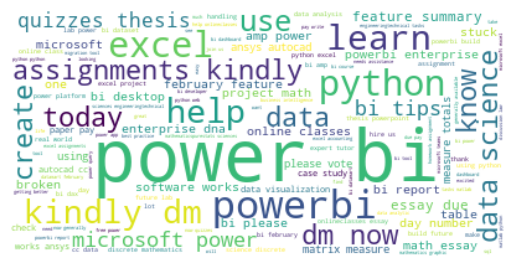

In [12]:
from wordcloud import WordCloud

text = " ".join(str(review) for review in df['Text'])


wordcloud = WordCloud(background_color='white', max_words=200, contour_width=3, contour_color='steelblue').generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
